# Confocal_FISH_scipy_Wiener_GT
Use the GT image to determine the optimal window size of the Wiener filter provided by Scipy.

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

#from ipywidgets import *
try:
    import cv2
except:
    !pip install cv2
    import cv2
    
#import kernels
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    from scipy.signal import wiener
except:
    !pip install scipy
    from scipy.signal import wiener

In [5]:
Args = namedtuple("args", ["clean", "noisy"])
args = Args("http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH.png",
         "http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH_1.png")

In [6]:
Y = skimage_io.imread(args.noisy)

In [7]:
X = skimage_io.imread(args.clean)

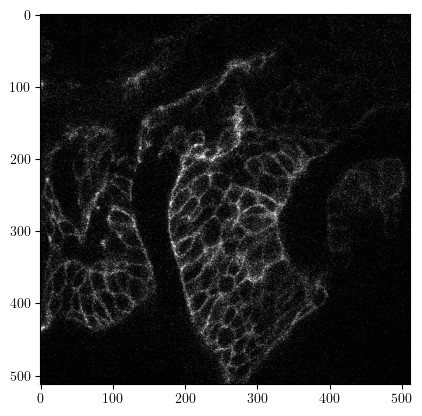

In [8]:
plt.imshow(Y, cmap="gray")

In [9]:
PCCs = []
for i in range(3, 33, 2):
    denoised = wiener(Y.astype(np.float32), mysize=i)
    PCC = np.corrcoef(denoised.flatten(), X.flatten())[0, 1]
    print(i, PCC)
    PCCs.append((i, PCC))

3 0.8690483603160106
5 0.8841295072158266
7 0.8856301034944385
9 0.8837031035634897
11 0.8805363510740811
13 0.8768333007663707
15 0.8729637972878331
17 0.8689887162821903
19 0.8650413497245607
21 0.8612849509232737
23 0.8577532987552984
25 0.8542774724855441
27 0.8508758209774613
29 0.8476320550476382
31 0.8445276185580002


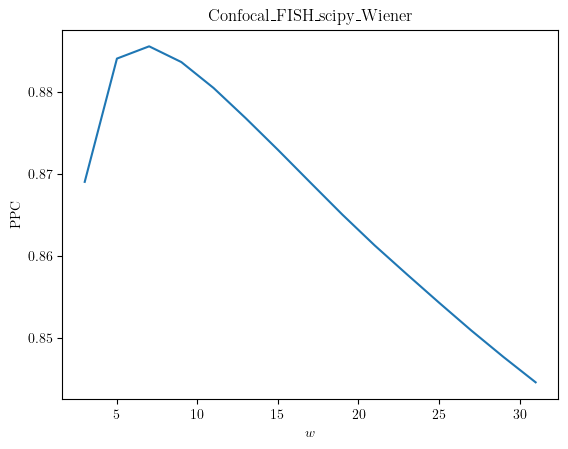

In [10]:
window_sizes = [item[0] for item in PCCs]
pcc_values = [item[1] for item in PCCs]
plt.title(r"$\mathrm{Confocal\_FISH\_scipy\_Wiener}$")
plt.xlabel(r"$w$")
plt.ylabel(r"$\mathrm{PPC}$")
plt.plot(window_sizes, pcc_values)

In [11]:
optimal_w =  window_sizes[np.argmax(pcc_values)]
print("Optimal window size:", optimal_w)

Optimal window size: 7


In [12]:
print("Maximum PCC:", np.max(pcc_values))

Maximum PCC: 0.8856301034944385


In [13]:
denoised = wiener(Y.astype(np.float32), mysize=optimal_w)

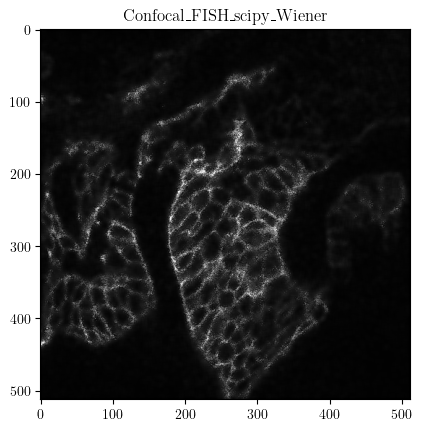

In [14]:
plt.title(r"$\mathrm{Confocal\_FISH\_scipy\_Wiener}$")
plt.imshow(denoised, cmap="gray")
plt.savefig('Confocal_FISH_scipy_Wiener.pdf', bbox_inches='tight')

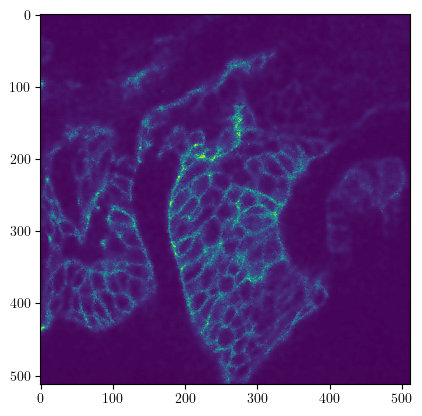

In [15]:
plt.imshow(denoised)

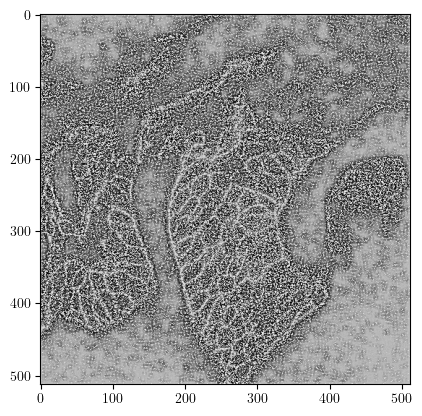

In [16]:
plt.imshow(cv2.equalizeHist(((Y-denoised) + 128).astype(np.uint8)), cmap="gray")

In [17]:
PCC = np.corrcoef(denoised.flatten(), X.flatten())[0, 1]

In [18]:
print(PCC)

0.8856301034944385


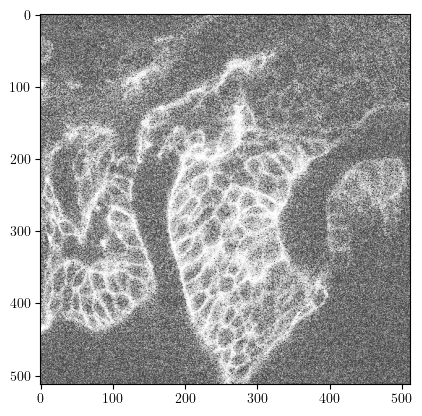

In [19]:
plt.imshow(cv2.equalizeHist(((Y)).astype(np.uint8)), cmap="gray")

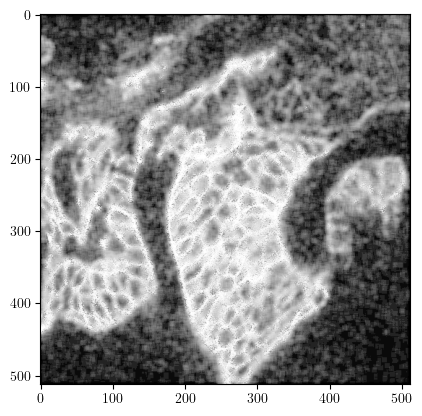

In [20]:
plt.imshow(cv2.equalizeHist(((denoised)).astype(np.uint8)), cmap="gray")

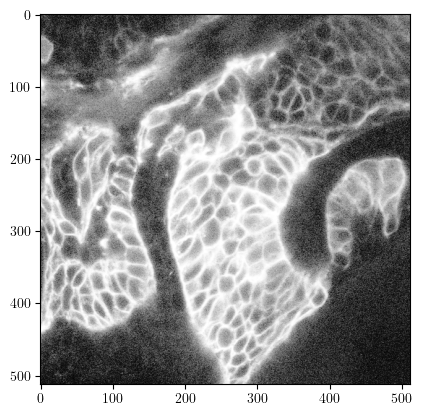

In [21]:
plt.imshow(cv2.equalizeHist(((X)).astype(np.uint8)), cmap="gray")